In [1]:
import pandas as pd
import scvelo as scv
import scanpy as sc
import numpy as np
scv.logging.print_version()

Running scvelo 0.2.5 (python 3.9.12) on 2023-03-29 01:45.


ERROR: XMLRPC request failed [code: -32500]
RuntimeError: PyPI no longer supports 'pip search' (or XML-RPC search). Please use https://pypi.org/search (via a browser) instead. See https://warehouse.pypa.io/api-reference/xml-rpc.html#deprecated-methods for more information.


In [2]:
scv.settings.verbosity = 3  # show errors(0), warnings(1), info(2), hints(3)
scv.settings.presenter_view = True  # set max width size for presenter view
scv.set_figure_params('scvelo')  # for beautified visualization

In [3]:
velo_dict = dict()

In [9]:
#load loom from scvelo output
adata = scv.read('arc_outputs/countB/possorted_genome_bam_KG70A.loom', cache=True)
#load positions matrix for file
positions = pd.read_csv("position_mtx/sampleB.csv")
positions = positions.tail(positions.shape[0] -1)
positions.index = positions.index.rename("CellID")
positions["CellID"] = positions["Barcode"]
positions.drop("Barcode", inplace=True, axis=1)
positions.index = positions["CellID"]
positions['pxl_col_in_fullres'] = positions['pxl_col_in_fullres'].astype('float32')
positions['pxl_row_in_fullres'] = positions['pxl_row_in_fullres'].astype('float32')

adata.obs = adata.obs.join(positions, how="left")

adata.obsm['X_umap'] = adata.obs[
            ['pxl_row_in_fullres', 'pxl_col_in_fullres']
        ].to_numpy()

adata.obs.drop(
            columns=['CellID', 'pxl_row_in_fullres', 'pxl_col_in_fullres'],
            inplace=True,
        )

#load metadata for sample
core_edge = pd.read_csv("scvelo_core_edge_anno/sample_2.csv")
core_edge = core_edge.tail(core_edge.shape[0] -1)
core_edge["CellID"] = core_edge["Barcode"]
core_edge.drop("Barcode", inplace=True, axis=1)
core_edge.index = core_edge["CellID"]
adata.obs = adata.obs.join(core_edge, how="left")
adata = adata[adata.obs['cluster_annotations'].isin(['core', 'edge','transitory'])]
scv.pp.filter_and_normalize(adata)
scv.pp.moments(adata)
scv.tl.recover_dynamics(adata,n_jobs = 10)
scv.tl.velocity_graph(adata)
scv.tl.velocity(adata, mode='dynamical')
scv.tl.velocity_graph(adata)
scv.tl.latent_time(adata)
scv.tl.velocity_confidence(adata)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, copying.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Normalized count data: X, spliced, unspliced.
Logarithmized X.
computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
recovering dynamics (using 10/10 cores)


  0%|          | 0/1656 [00:00<?, ?gene/s]

    finished (0:00:33) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:02) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/10 cores)


  0%|          | 0/982 [00:00<?, ?cells/s]

    finished (0:00:00) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocities
    finished (0:00:01) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/10 cores)


  0%|          | 0/982 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing terminal states
    identified 0 region of root cells and 1 region of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells as prior
    finished (0:00:01) --> added 
    'latent_time', shared time (adata.obs)
--> added 'velocity_length' (adata.obs)
--> added 'velocity_confidence' (adata.obs)
--> added 'velocity_confidence_transition' (adata.obs)


computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
saving figure to file plots/vector_sample2.png


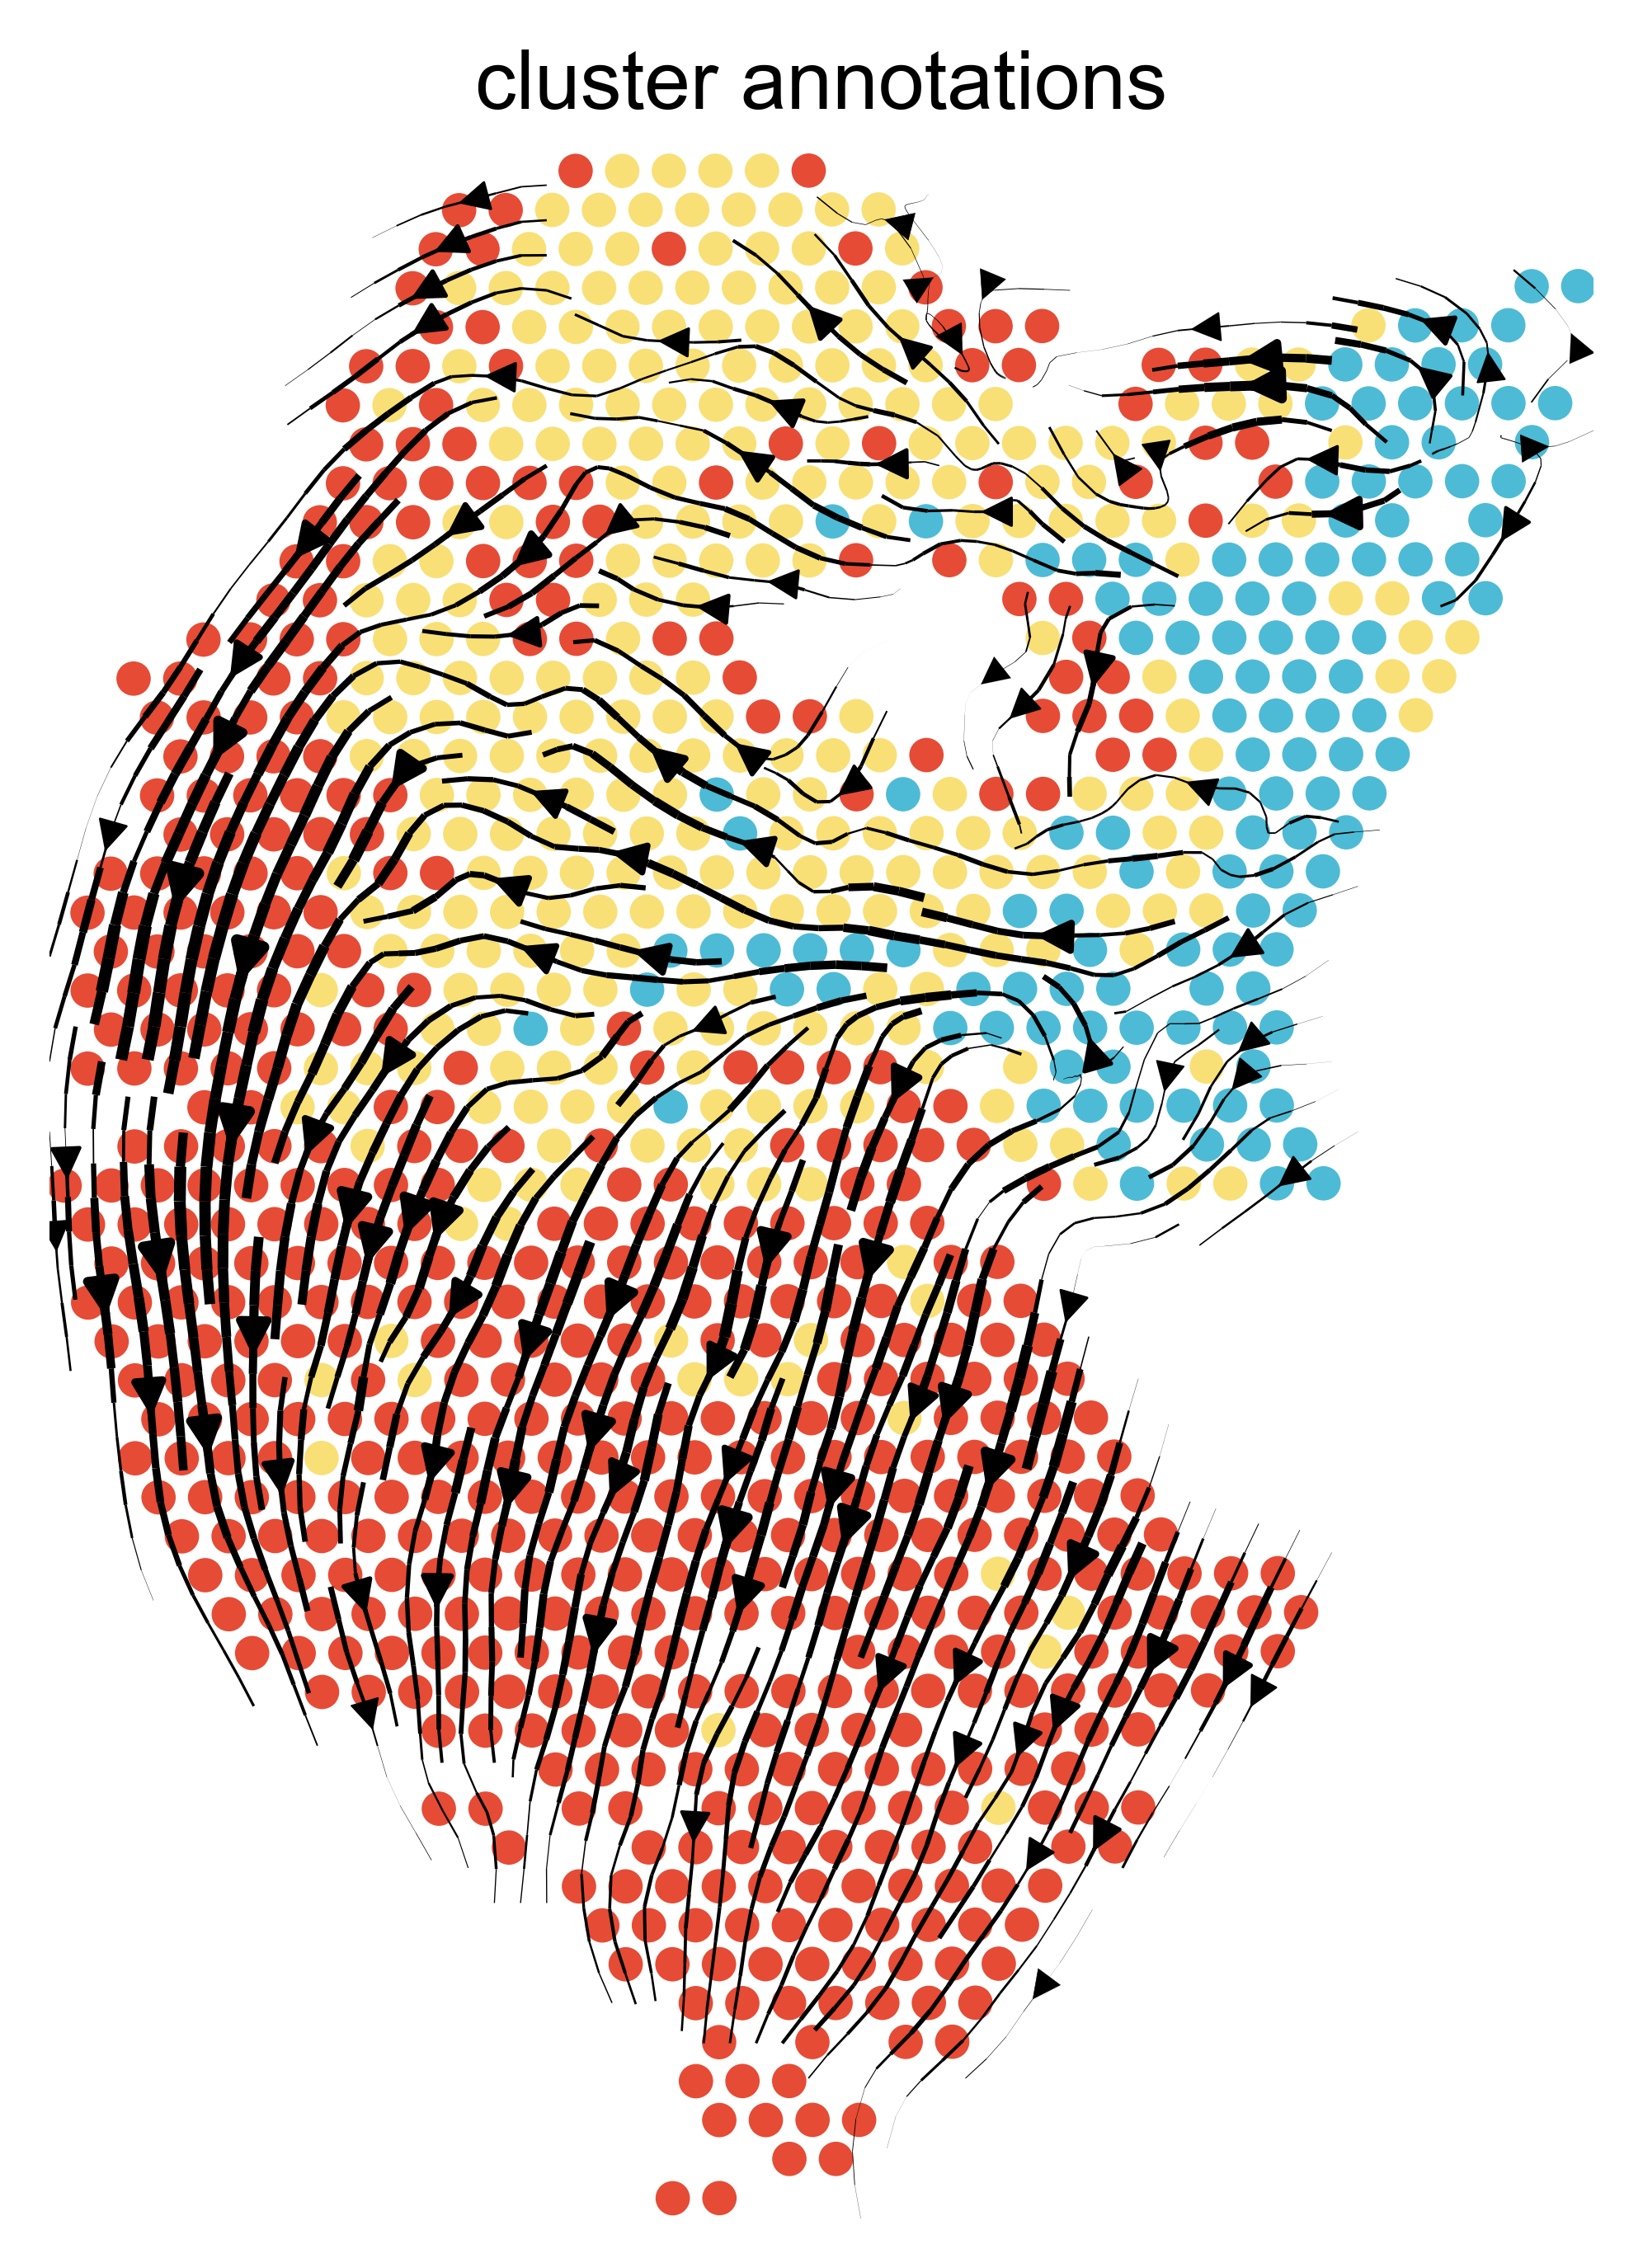

In [10]:
scv.pl.velocity_embedding_stream(adata, basis='umap',color='cluster_annotations',
                                 palette = ["#4DBBD5FF","#E64B35FF","#F9E076"],
                                size = 100,
                                save=f"plots/vector_sample2.png",dpi = 300,legend_loc='none', alpha = 1,
                                figsize = (4,5.5))

In [14]:
#load loom from scvelo output
adata = scv.read('arc_outputs/countE/possorted_genome_bam_XBTYO.loom', cache=True)
#load positions matrix for file
positions = pd.read_csv("position_mtx/countE.csv")
positions = positions.tail(positions.shape[0] -1)
positions.index = positions.index.rename("CellID")
positions["CellID"] = positions["Barcode"]
positions.drop("Barcode", inplace=True, axis=1)
positions.index = positions["CellID"]
positions['pxl_col_in_fullres'] = positions['pxl_col_in_fullres'].astype('float32')
positions['pxl_row_in_fullres'] = positions['pxl_row_in_fullres'].astype('float32')

adata.obs = adata.obs.join(positions, how="left")

adata.obsm['X_umap'] = adata.obs[
            ['pxl_row_in_fullres', 'pxl_col_in_fullres']
        ].to_numpy()

adata.obs.drop(
            columns=['CellID', 'pxl_row_in_fullres', 'pxl_col_in_fullres'],
            inplace=True,
        )

#load metadata for sample
core_edge = pd.read_csv("scvelo_core_edge_anno/sample_5.csv")
core_edge = core_edge.tail(core_edge.shape[0] -1)
core_edge["CellID"] = core_edge["Barcode"]
core_edge.drop("Barcode", inplace=True, axis=1)
core_edge.index = core_edge["CellID"]
adata.obs = adata.obs.join(core_edge, how="left")
adata = adata[adata.obs['cluster_annotations'].isin(['core', 'edge','transitory'])]
scv.pp.filter_and_normalize(adata)
scv.pp.moments(adata)
scv.tl.recover_dynamics(adata)
scv.tl.velocity_graph(adata)
scv.tl.velocity(adata, mode='dynamical')
scv.tl.velocity_graph(adata)
scv.tl.latent_time(adata)
scv.tl.velocity_confidence(adata)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, copying.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Normalized count data: X, spliced, unspliced.
Logarithmized X.
computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
recovering dynamics (using 1/10 cores)


  0%|          | 0/1743 [00:00<?, ?gene/s]

    finished (0:02:39) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:02) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/10 cores)


  0%|          | 0/941 [00:00<?, ?cells/s]

    finished (0:00:00) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocities
    finished (0:00:01) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/10 cores)


  0%|          | 0/941 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing terminal states
    identified 0 region of root cells and 1 region of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells as prior
    finished (0:00:01) --> added 
    'latent_time', shared time (adata.obs)
--> added 'velocity_length' (adata.obs)
--> added 'velocity_confidence' (adata.obs)
--> added 'velocity_confidence_transition' (adata.obs)


computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
saving figure to file plots/vector_sample5.png


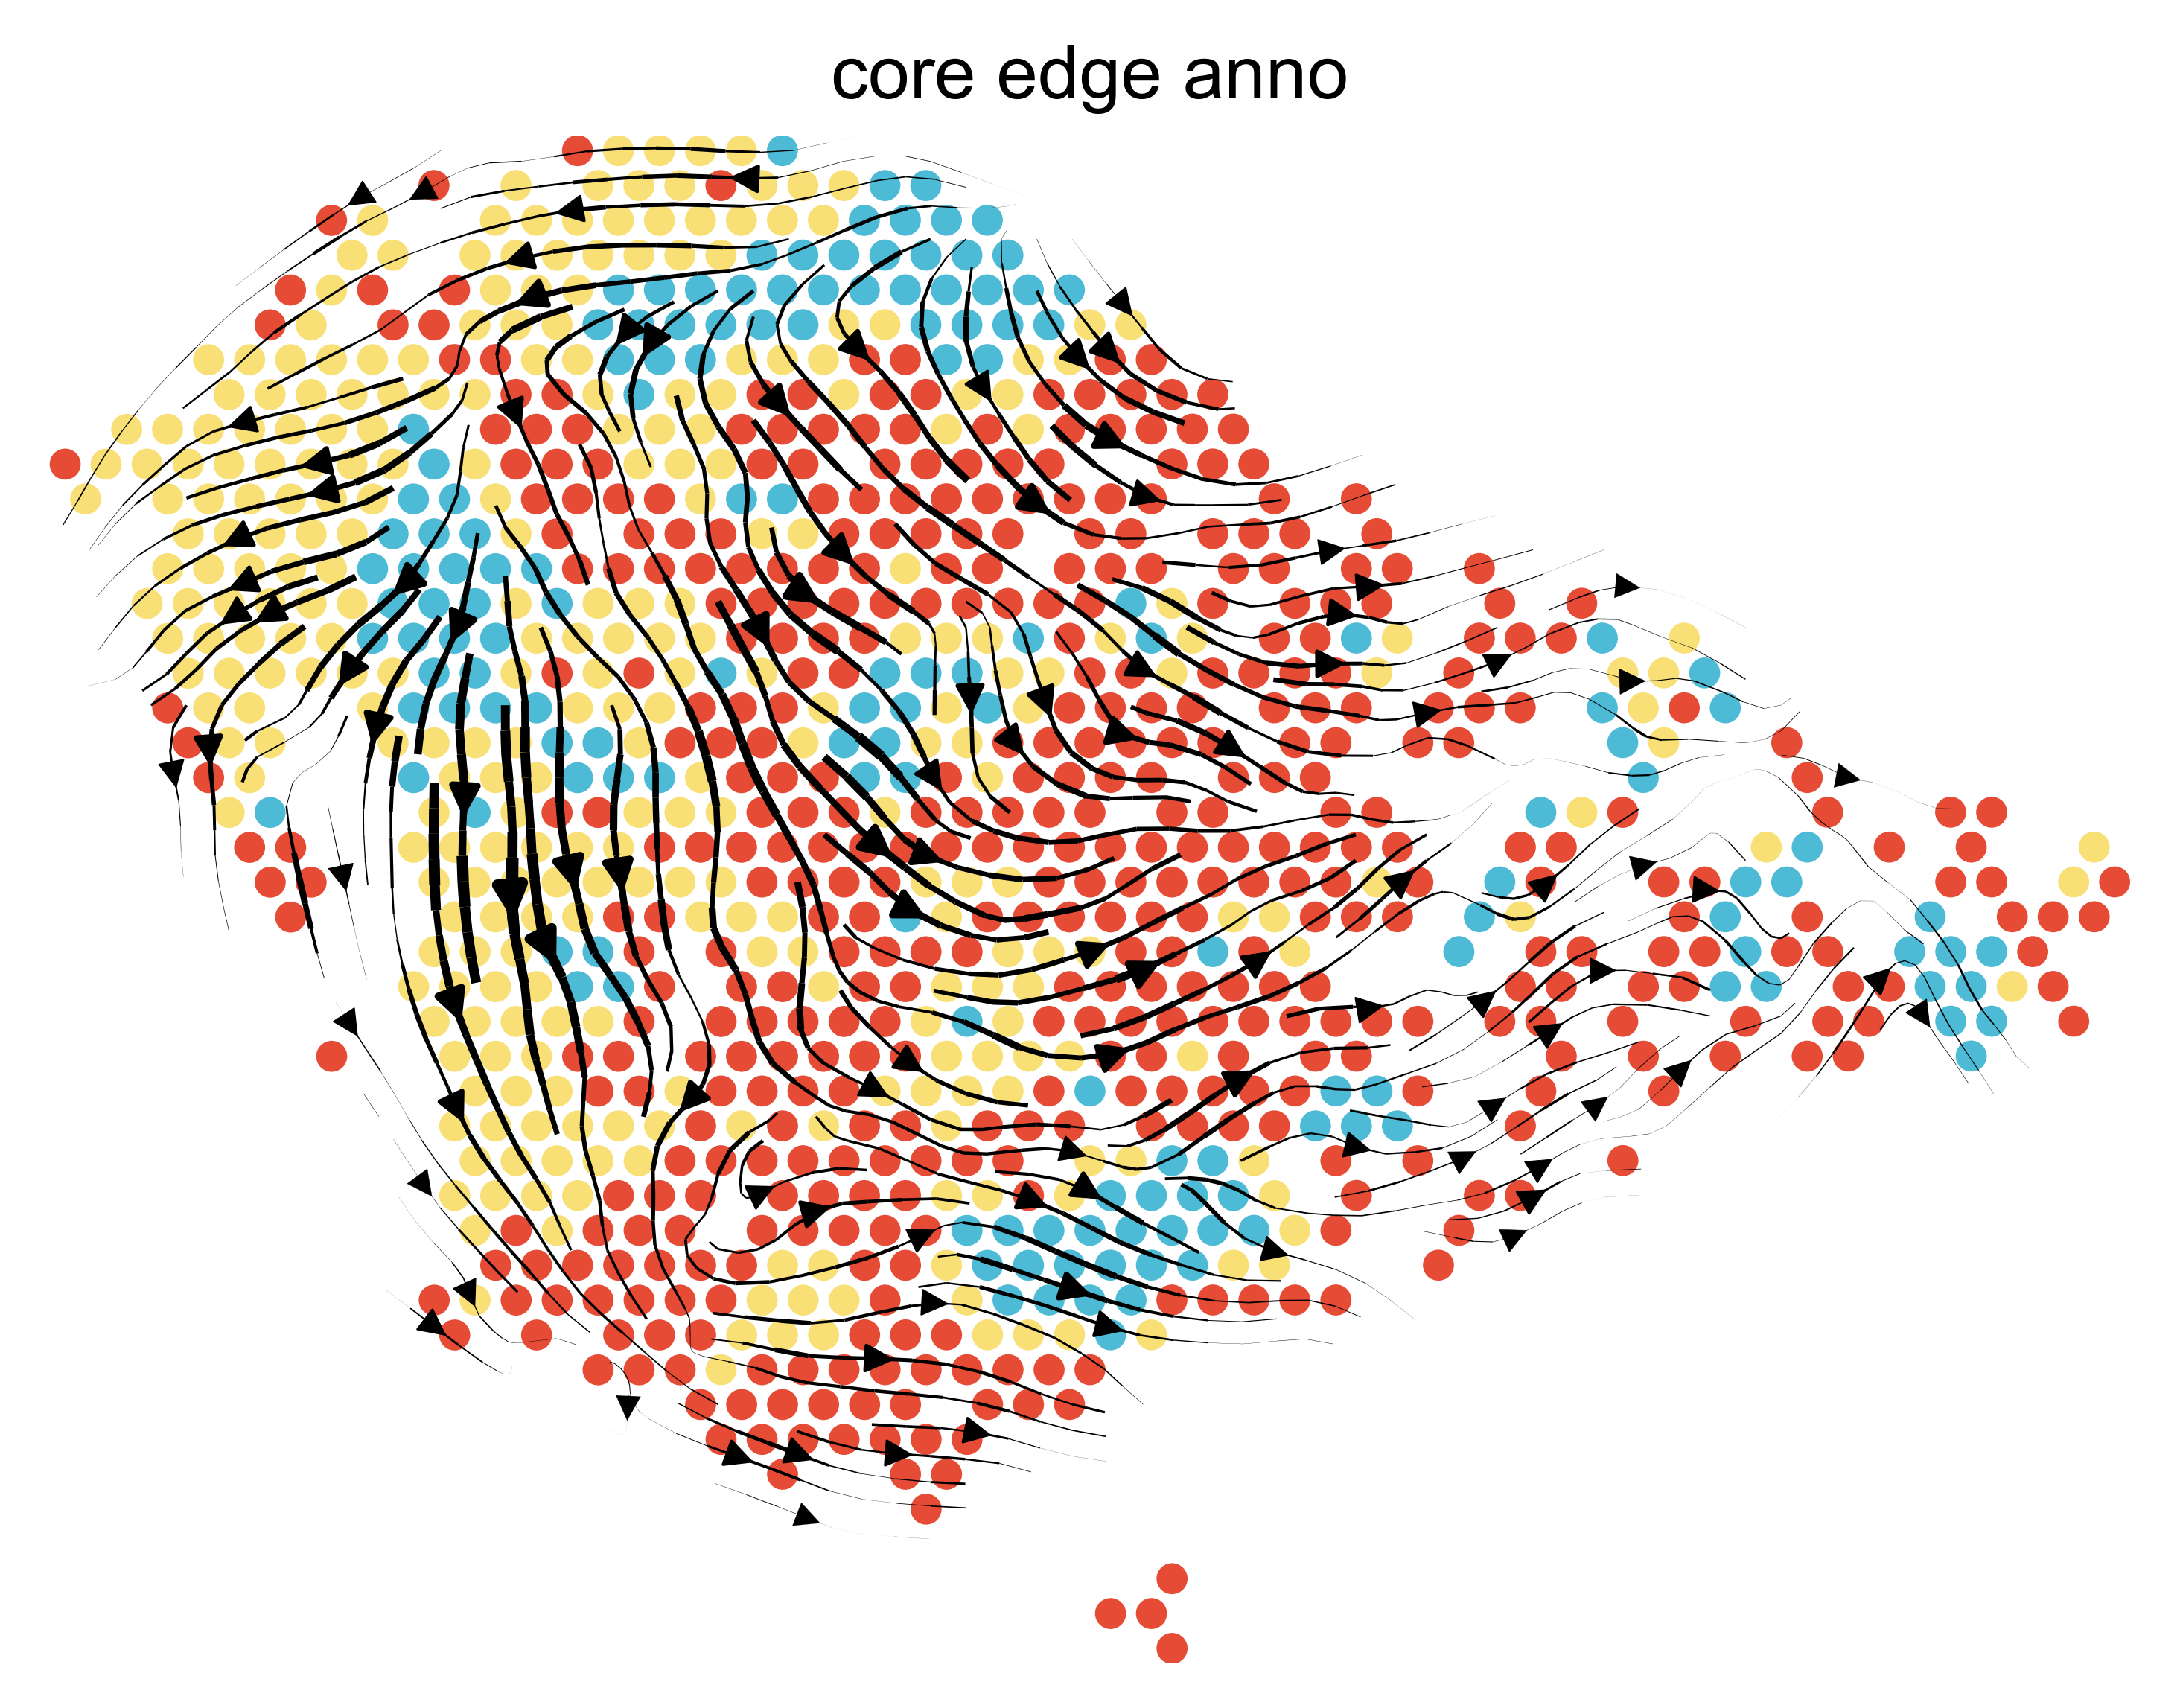

In [15]:
scv.pl.velocity_embedding_stream(adata, basis='umap',color='core_edge_anno',
                                 palette = ["#4DBBD5FF","#E64B35FF","#F9E076"],
                                size = 100,
                                save=f"plots/vector_sample5.png",dpi = 300,legend_loc='none', alpha = 1,
                                figsize = (6,4.5))